##### Import the libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)  # Adjusts the configuration of the plots we will create

###### Read in the data

In [2]:
df = pd.read_csv('movies.csv')
df.head(3)

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   

         gross            company  runtime  
0   46998772.0       Warner Bros.    146.0  
1   58853106.0  Columbia Pictures    104.0  
2  538375067.0          Lucasfilm    124.0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


##### Filtering the data

In [4]:
# Checking the null values

for col in df.columns:
    n_missing = sum(df[col].isnull())
    pct_missing = np.mean(df[col].isnull())
    print(f'{col}: {pct_missing}% ({n_missing})')

name: 0.0% (0)
rating: 0.010041731872717789% (77)
genre: 0.0% (0)
year: 0.0% (0)
released: 0.0002608242044861763% (2)
score: 0.0003912363067292645% (3)
votes: 0.0003912363067292645% (3)
director: 0.0% (0)
writer: 0.0003912363067292645% (3)
star: 0.00013041210224308815% (1)
country: 0.0003912363067292645% (3)
budget: 0.2831246739697444% (2171)
gross: 0.02464788732394366% (189)
company: 0.002217005738132499% (17)
runtime: 0.0005216484089723526% (4)


<AxesSubplot:>

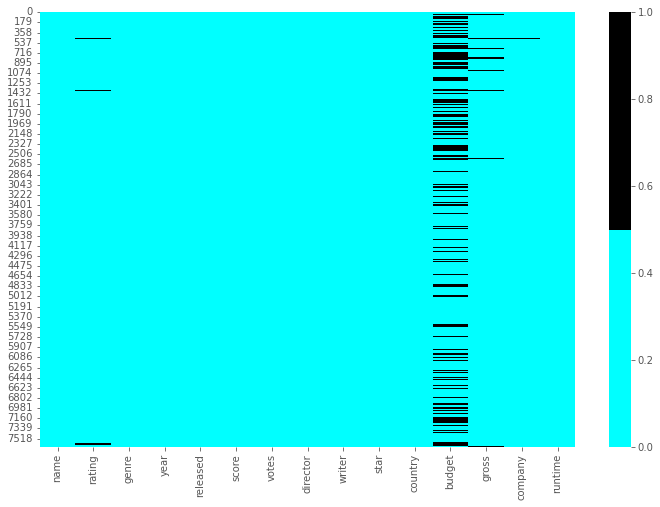

In [5]:
# Visualizing the missing data

cols = df.columns[:]
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(['cyan','black']))  # Black is missing, cyan is non-missing

In [6]:
# Checking for duplicates

sum(df.duplicated())

0

In [7]:
# Data types for the columns

df[['budget','gross']] = df[['budget','gross']].astype('Int64')

In [8]:
df.head(2)

name rating      genre  year                       released  \
0      The Shining      R      Drama  1980  June 13, 1980 (United States)   
1  The Blue Lagoon      R  Adventure  1980   July 2, 1980 (United States)   

   score     votes         director                   writer            star  \
0    8.4  927000.0  Stanley Kubrick             Stephen King  Jack Nicholson   
1    5.8   65000.0   Randal Kleiser  Henry De Vere Stacpoole  Brooke Shields   

          country    budget     gross            company  runtime  
0  United Kingdom  19000000  46998772       Warner Bros.    146.0  
1   United States   4500000  58853106  Columbia Pictures    104.0

In [9]:
# Year column has some incorrect values, so adding release year column

#df['released'].str.split(' ')[0][2]

df['released year'] = df['released'].str.split(' ', n=3, expand=True)[2]
df.drop('year', axis=1, inplace=True)
df.head(2)

name rating      genre                       released  score  \
0      The Shining      R      Drama  June 13, 1980 (United States)    8.4   
1  The Blue Lagoon      R  Adventure   July 2, 1980 (United States)    5.8   

      votes         director                   writer            star  \
0  927000.0  Stanley Kubrick             Stephen King  Jack Nicholson   
1   65000.0   Randal Kleiser  Henry De Vere Stacpoole  Brooke Shields   

          country    budget     gross            company  runtime  \
0  United Kingdom  19000000  46998772       Warner Bros.    146.0   
1   United States   4500000  58853106  Columbia Pictures    104.0   

  released year  
0          1980  
1          1980

In [10]:
df.sort_values(by='gross', ascending=False, inplace=False).head(3)

name rating   genre                           released  \
5445             Avatar  PG-13  Action  December 18, 2009 (United States)   
7445  Avengers: Endgame  PG-13  Action     April 26, 2019 (United States)   
3045            Titanic  PG-13   Drama  December 19, 1997 (United States)   

      score      votes       director              writer               star  \
5445    7.8  1100000.0  James Cameron       James Cameron    Sam Worthington   
7445    8.4   903000.0  Anthony Russo  Christopher Markus  Robert Downey Jr.   
3045    7.8  1100000.0  James Cameron       James Cameron  Leonardo DiCaprio   

            country     budget       gross                company  runtime  \
5445  United States  237000000  2847246203  Twentieth Century Fox    162.0   
7445  United States  356000000  2797501328         Marvel Studios    181.0   
3045  United States  200000000  2201647264  Twentieth Century Fox    194.0   

     released year  
5445          2009  
7445          2019  
3045          1997

In [11]:
# Sorting out genre by movie counts

genre = df.groupby(['genre']).size().sort_values(ascending=False).reset_index()
genre.columns = ['genre', 'count']

genre

genre  count
0      Comedy   2245
1      Action   1705
2       Drama   1518
3       Crime    551
4   Biography    443
5   Adventure    427
6   Animation    338
7      Horror    322
8     Fantasy     44
9     Mystery     20
10   Thriller     16
11     Family     11
12    Romance     10
13     Sci-Fi     10
14    Western      3
15    Musical      2
16      Sport      1
17      Music      1
18    History      1

In [12]:
# Accumulating the smaller genre collections in a single group 'Others'

others = genre.loc[list(range(8,19))]['count'].sum()
genre = genre.drop(list(range(8,19)))
genre.loc[8] = ['Others', others]

genre

genre  count
0     Comedy   2245
1     Action   1705
2      Drama   1518
3      Crime    551
4  Biography    443
5  Adventure    427
6  Animation    338
7     Horror    322
8     Others    119

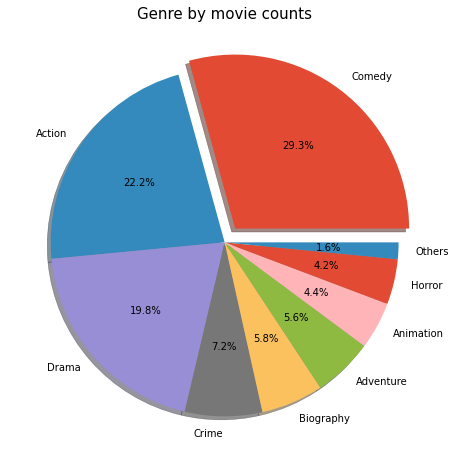

In [13]:
# Visualizing the genre counts in a pie chart

plt.pie(genre['count'], labels=genre['genre'], autopct='%1.1f%%', explode=(0.1,0,0,0,0,0,0,0,0), shadow=True) # only explode the largest slice
plt.title('Genre by movie counts', fontsize=15)
plt.show()

In [14]:
# Top 15 countries releasing the highest movies other than US

top_countries = df['country'].value_counts().reset_index().drop([0]).head(15)
top_countries = top_countries.rename(columns={'index': 'Country', 'country': 'Total movies'})
top_countries

Country  Total movies
1   United Kingdom           816
2           France           279
3           Canada           190
4          Germany           117
5        Australia            92
6            Japan            81
7            India            62
8            Italy            61
9            Spain            47
10       Hong Kong            45
11         Ireland            43
12           China            40
13     South Korea            35
14         Denmark            32
15          Sweden            25

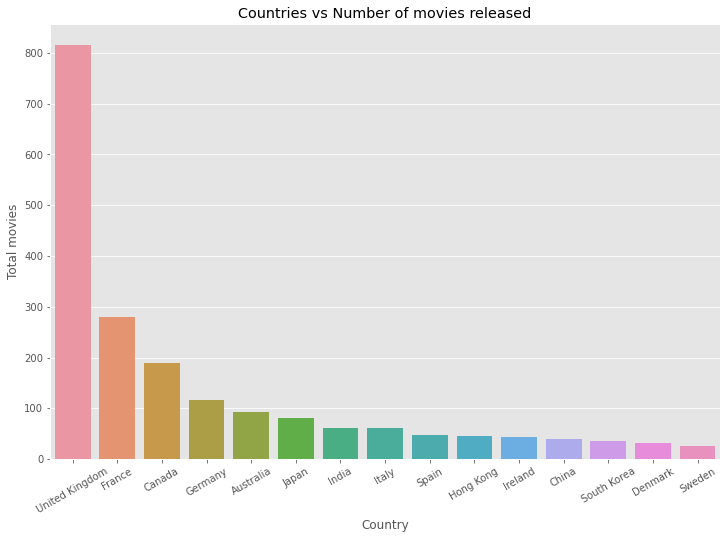

In [15]:
sns.barplot(x=top_countries['Country'], y=top_countries['Total movies']).set(title='Countries vs Number of movies released')
plt.xticks(rotation=30)
plt.show()

In [37]:
from wordcloud import WordCloud, STOPWORDS



In [38]:
df.head(2)

name rating      genre                       released  score  \
0      The Shining      R      Drama  June 13, 1980 (United States)    8.4   
1  The Blue Lagoon      R  Adventure   July 2, 1980 (United States)    5.8   

      votes         director                   writer            star  \
0  927000.0  Stanley Kubrick             Stephen King  Jack Nicholson   
1   65000.0   Randal Kleiser  Henry De Vere Stacpoole  Brooke Shields   

          country    budget     gross            company  runtime  \
0  United Kingdom  19000000  46998772       Warner Bros.    146.0   
1   United States   4500000  58853106  Columbia Pictures    104.0   

  released year  
0          1980  
1          1980

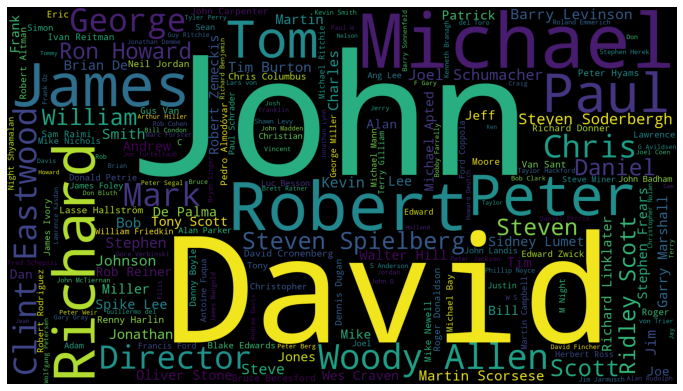

In [39]:
plt.subplots()
wordcloud = WordCloud(background_color='black', width=1920, height=1080).generate(' '.join(df.director))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [128]:
pd.set_option('display.max_rows', None)

##### Finding correlation in the data

Text(0, 0.5, 'Gross Revenue')

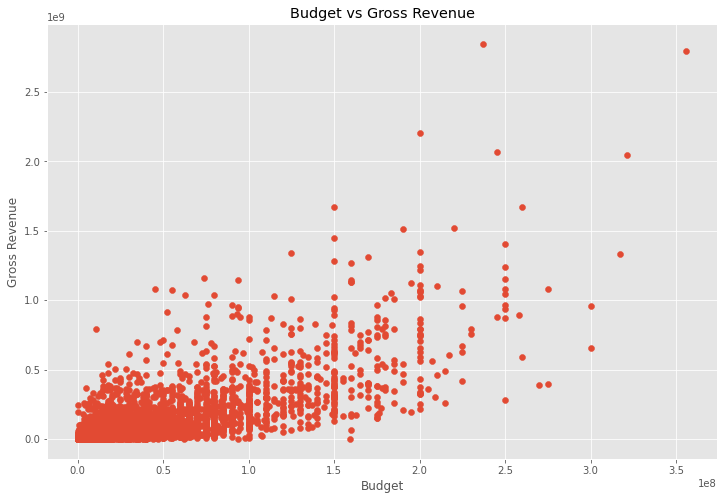

In [131]:
# Scatter plot with budget vs gross

df['budget']=df['budget'].astype('float')
df['gross']=df['gross'].astype('float')

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Revenue')
plt.xlabel('Budget')
plt.ylabel('Gross Revenue')

<AxesSubplot:xlabel='budget', ylabel='gross'>

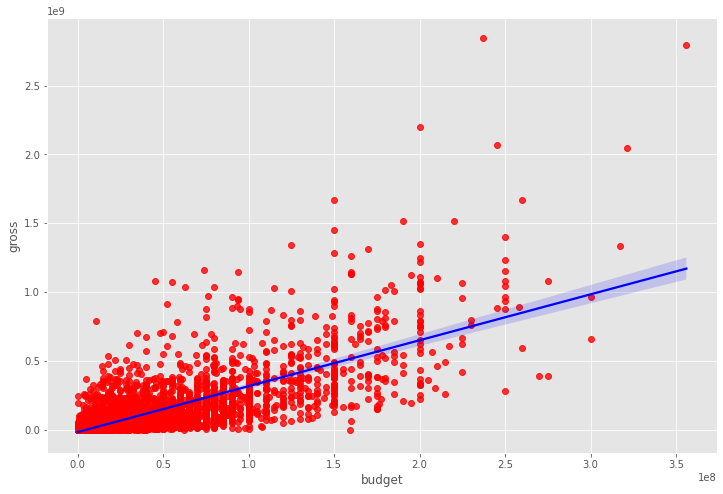

In [132]:
# Regression plot: how much budget is correlated to gross revenue

sns.regplot(x='budget', y='gross', data=df,
            scatter_kws={"color": "red"},
            line_kws={"color": "blue"})

In [133]:
df.corr()

score     votes    budget     gross   runtime
score    1.000000  0.409182  0.076254  0.186258  0.399451
votes    0.409182  1.000000  0.442429  0.630757  0.309212
budget   0.076254  0.442429  1.000000  0.740395  0.320447
gross    0.186258  0.630757  0.740395  1.000000  0.245216
runtime  0.399451  0.309212  0.320447  0.245216  1.000000

Text(87.0, 0.5, 'Movie Features')

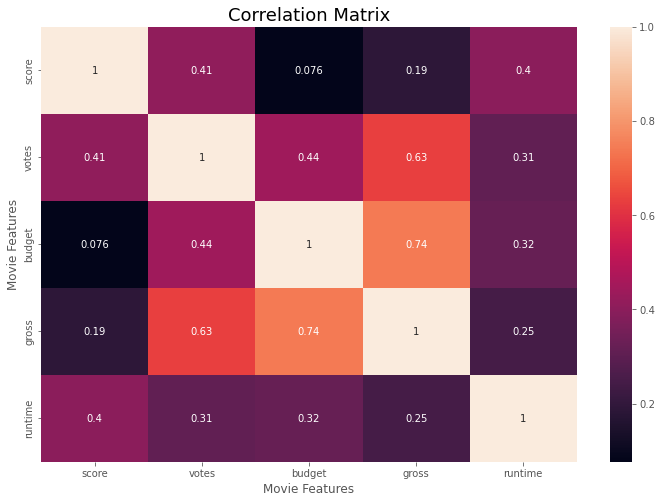

In [135]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix', fontsize=18)
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

In [136]:
df.head(3)

name rating      genre  \
0                                     The Shining      R      Drama   
1                                 The Blue Lagoon      R  Adventure   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   

         gross            company  runtime released year  
0   46998772.0       Warner Bros.    146.0          1980  
1   58853106.0  Columbia Pictures    104.0          1980  
2  538375067.0          Lucasfilm    124.0          1980

In [137]:
# To find correlations between company and budget, revenue - we categorize companies with numeric values

df_numerized = df

for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes            #cat.codes gives random numerization
        
df_numerized

name  rating  genre  released  score      votes  director  writer  star  \
0     6587       6      6      1705    8.4   927000.0      2589    4014  1047   
1     5573       6      1      1492    5.8    65000.0      2269    1632   327   
2     5142       4      0      1771    8.7  1200000.0      1111    2567  1745   
3      286       4      4      1492    7.7   221000.0      1301    2000  2246   
4     1027       6      4      1543    7.3   108000.0      1054     521   410   
5     2109       6     10      2502    6.4   123000.0      2528    4362   241   
6     5574       6      0      1771    7.9   188000.0      1412     838  1277   
7     4436       6      3       699    8.2   330000.0      1829    1769  2240   
8     5281       4      0      1753    6.8   101000.0      2306    1979   877   
9     6213       6      3      2286    7.0    10000.0      2864     423   589   
10     463       4      0       674    6.1    18000.0       357    3985   483   
11    5920       4      1      2987    7.3    54000.0      1199    1832  1949   
12    4315       4      1       626    5.3    30000.0      2352    2333  2262   
13    4084       6      6      3211    7.7    49000.0      2388    2327   678   
14    1687       6      5      1543    7.1    37000.0       318     520  1850   
15    5024       4      6      3021    7.2    27000.0      1243    3548   465   
16    1900       6      6      2286    6.6    21000.0        49     735   707   
17      92       4      4       699    6.9    29000.0       514    3262  1110   
18    5865       6     10      1108    6.8    66000.0      1374    2104    24   
19    5189       6      4       626    6.8    26000.0      2561     556   878   
20    1387       6      5       945    6.5    20000.0      2891    4451    37   
21    2451       6      1       160    6.8    14000.0      1892    2926  1525   
22    5845       4      0       281    6.7    22000.0       744    4192  1514   
23    7445       4      8       585    5.3    12000.0      2371    3528  2033   
24    7127       4      6      1913    6.4    14000.0      1153      12  1318   
25     346       6     10       773    6.9    33000.0      1583    3234  2766   
26    3263       6      4      2059    6.5     5100.0      2433    2483  2565   
27    4442       4      0       281    5.0     4100.0      1282      33  1140   
28     980       6      5      1771    7.2    17000.0      2673    4386  2252   
29     362       6      5       886    6.2    22000.0      2151    3326  2211   
30    3796       4      4      3296    7.1     8900.0      2811      83   430   
31    4373       6     10      1467    5.4    16000.0      2143    4455  1600   
32    4987       4      0       342    5.3    15000.0      1041    1587   342   
33    1103       4      6       160    6.1      604.0      1644     958  2372   
34    4785       4      4       699    6.7     9100.0      1225    3136   914   
35    4362       6      4      2818    6.2    24000.0      1091    3107   914   
36    6008       6      4      2452    6.3     4300.0       855    1358  2665   
37    3721       6      4      2965    6.0    11000.0      1598    3642  2283   
38    6102       4      6       699    5.9     4000.0      2296    3826  1576   
39    1244       4      3      2195    7.5    17000.0      1884    4201  2462   
40    6748       4      7      3101    6.3     5700.0      1403     518   243   
41     927       4      6      1588    7.9    13000.0       335    2252   721   
42    6644       6      0      1836    7.1     9000.0      2314    2543  2126   
43    7305       6      3       169    6.6    11000.0       186    1682  2114   
44    5504       6     10      3042    4.8     2000.0      1978     151   406   
45    1152       6      4      1467    6.1    12000.0      2804    4298   408   
46    6094       6      0      1705    5.3     3900.0      1934    3357  1850   
47    5578       6     10      2775    4.6     3900.0      2836    4344  2535   
48    6360       4      0      2502  

Text(0.5, 1.0, 'Correlation Matrix (all features)')

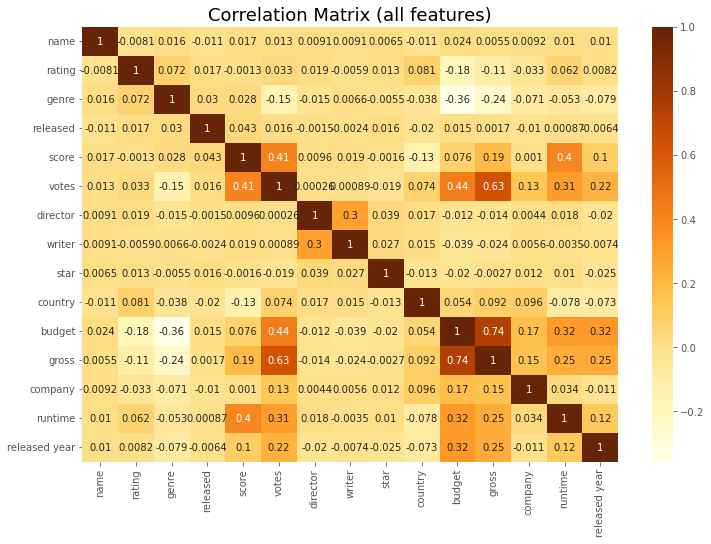

In [138]:
correlation_matrix = df_numerized.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrBr')
plt.title('Correlation Matrix (all features)',fontsize=18)

In [139]:
# Unstacking the correlation

df_numerized.corr().unstack()

name           name             1.000000
               rating          -0.008069
               genre            0.016355
               released        -0.011311
               score            0.017097
               votes            0.013088
               director         0.009079
               writer           0.009081
               star             0.006472
               country         -0.010737
               budget           0.023970
               gross            0.005533
               company          0.009211
               runtime          0.010392
               released year    0.010071
rating         name            -0.008069
               rating           1.000000
               genre            0.072423
               released         0.016613
               score           -0.001314
               votes            0.033225
               director         0.019483
               writer          -0.005921
               star             0.013405
               c

In [140]:
df_numerized.corr().unstack().sort_values()

genre          budget          -0.356564
budget         genre           -0.356564
gross          genre           -0.235650
genre          gross           -0.235650
budget         rating          -0.176002
rating         budget          -0.176002
votes          genre           -0.145307
genre          votes           -0.145307
country        score           -0.133348
score          country         -0.133348
rating         gross           -0.107339
gross          rating          -0.107339
released year  genre           -0.078972
genre          released year   -0.078972
country        runtime         -0.078412
runtime        country         -0.078412
country        released year   -0.072682
released year  country         -0.072682
genre          company         -0.071067
company        genre           -0.071067
genre          runtime         -0.052711
runtime        genre           -0.052711
writer         budget          -0.039451
budget         writer          -0.039451
country        g

In [141]:
# Finding high correlation

df_numerized.corr().unstack()[(df_numerized.corr().unstack() > 0.4) & (df_numerized.corr().unstack() != 1)]

score   votes     0.409182
votes   score     0.409182
        budget    0.442429
        gross     0.630757
budget  votes     0.442429
        gross     0.740395
gross   votes     0.630757
        budget    0.740395
dtype: float64

### Conclusion:

#### Votes and budget have the highest correlation to gross revenue